<a href="https://colab.research.google.com/github/Nisarg111/Time-Series/blob/main/ARIMAEX1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("https://github.com/liannewriting/YouTube-videos-public/blob/main/arima-model-time-series-prediction-python/website_data.csv?raw=true")
df.head()

,traffic
0,932
1,929
2,938
3,964
4,990


<Axes: >

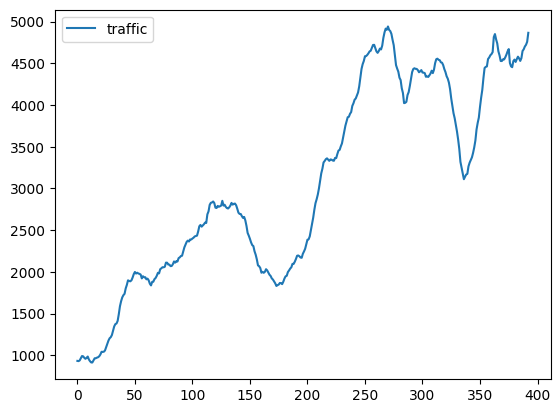

In [4]:
df.plot()

<Axes: >

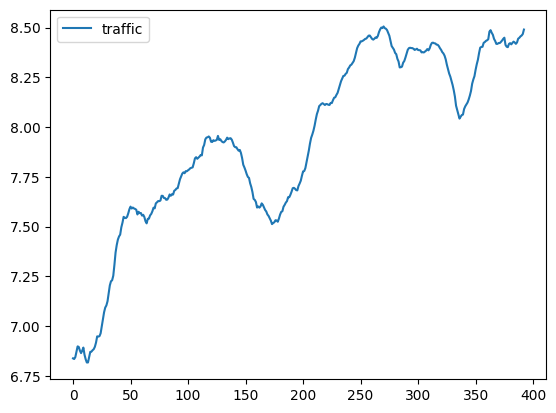

In [5]:
df = np.log(df)
df.plot()

In [6]:

msk = (df.index < len(df)-30)
# msk is boolean which is true for all the value except last 30
# df[msk].copy will copy all the value except last 30
df_train = df[msk].copy()
df_test = df[~msk].copy()

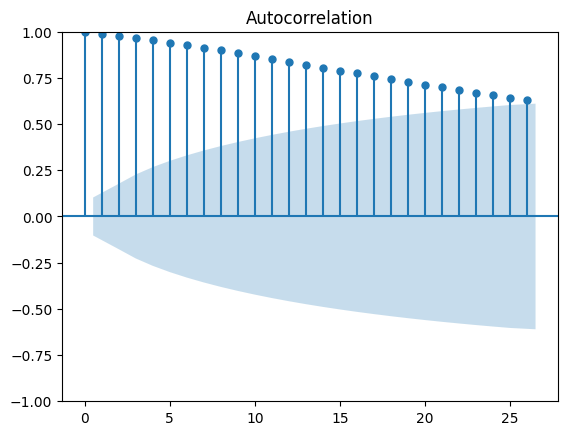

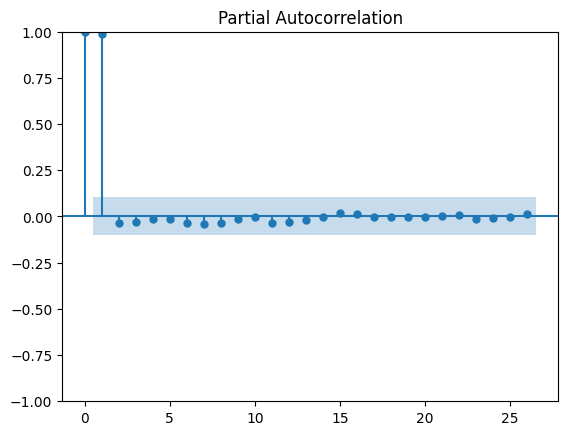

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(df_train)

pacf_original = plot_pacf(df_train)

In [8]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train)
print(f'p-value: {adf_test[1]}')

p-value: 0.24126116082883475


In [9]:
df_train_diff = df_train.diff().dropna()
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 0.02205946123912623


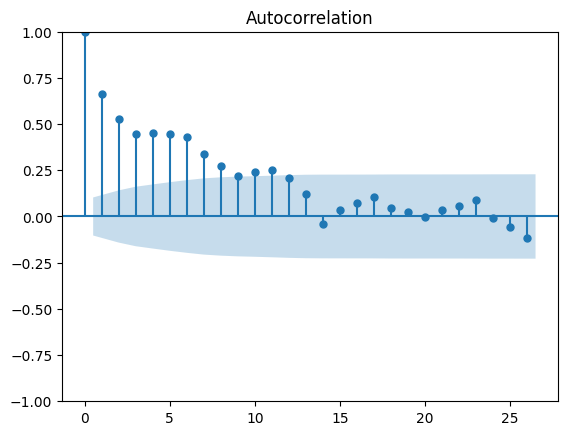

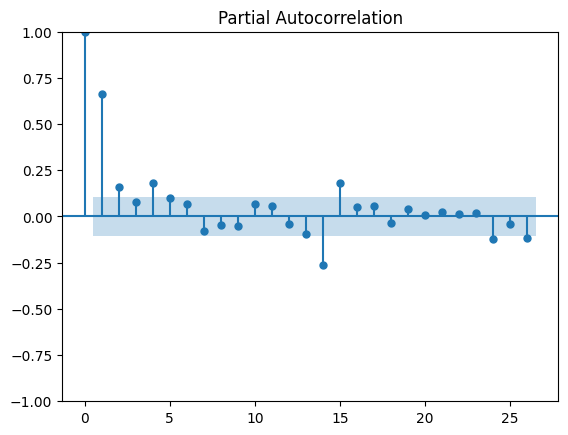

In [10]:
acf_original = plot_acf(df_train_diff)
pacf_original = plot_pacf(df_train_diff)

In [12]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df_train, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                traffic   No. Observations:                  363
Model:                 ARIMA(1, 1, 0)   Log Likelihood                1091.285
Date:                Wed, 29 May 2024   AIC                          -2178.570
Time:                        04:10:59   BIC                          -2170.787
Sample:                             0   HQIC                         -2175.476
                                - 363                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6976      0.036     19.428      0.000       0.627       0.768
sigma2         0.0001   8.76e-06     16.106      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   6.26   Jarque-

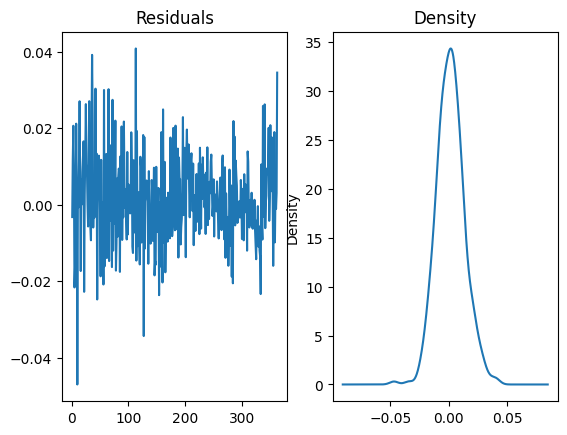

In [13]:
import matplotlib.pyplot as plt
residuals = model_fit.resid[1:]
fig, ax = plt.subplots(1,2)
residuals.plot(title='Residuals', ax=ax[0])
residuals.plot(title='Density', kind='kde', ax=ax[1])
plt.show()

<Axes: >

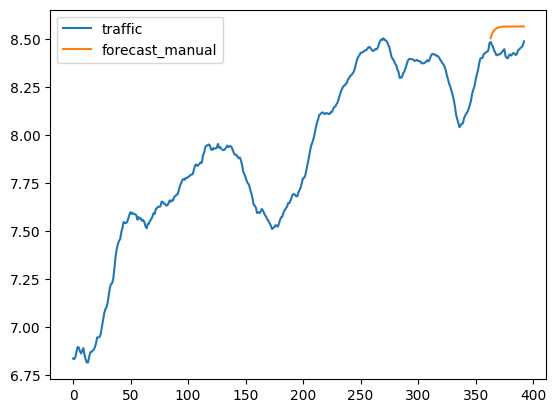

In [14]:
forecast_test = model_fit.forecast(len(df_test))
df['forecast_manual'] = [None]*len(df_train) + list(forecast_test)
df.plot()